In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [11]:
# Get the stock quote
df = DataReader('AMT', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,226.210007,219.270004,226.070007,219.600006,2786400.0,215.347305
2021-01-05,222.600006,219.089996,220.119995,220.710007,2481600.0,216.435791
2021-01-06,219.679993,214.559998,219.500000,214.889999,3230900.0,210.728516
2021-01-07,219.509995,214.679993,215.270004,217.500000,2933800.0,213.287949
2021-01-08,223.820007,218.110001,218.240005,222.199997,2310400.0,217.896942
...,...,...,...,...,...,...
2022-03-29,251.229996,247.270004,247.639999,250.550003,1917500.0,250.550003
2022-03-30,250.919998,247.369995,249.149994,250.869995,1385400.0,250.869995
2022-03-31,254.070007,250.699997,251.910004,251.220001,3315600.0,251.220001


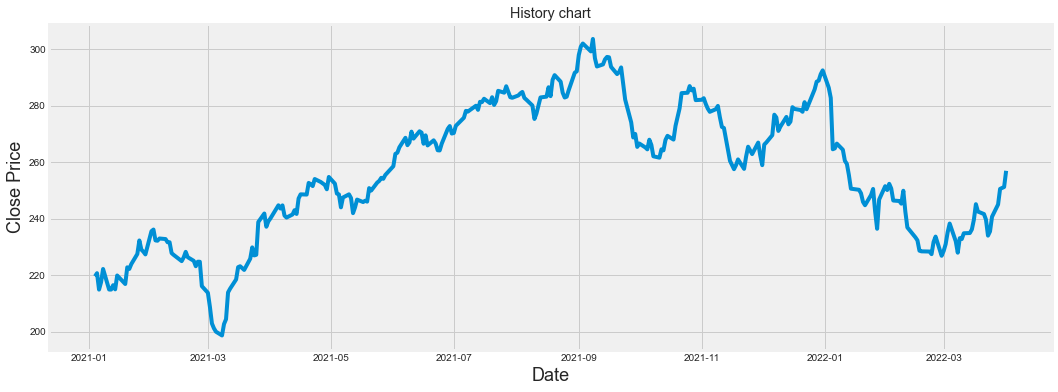

In [12]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [13]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [14]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.19950461],
       [0.21008008],
       [0.15463031],
       [0.17949693],
       [0.22427587],
       [0.15491612],
       [0.1548209 ],
       [0.16958846],
       [0.15558311],
       [0.20226751],
       [0.17358996],
       [0.2298018 ],
       [0.22427587],
       [0.24066308],
       [0.27486655],
       [0.3204077 ],
       [0.28963411],
       [0.28248853],
       [0.27343749],
       [0.35165784],
       [0.35718363],
       [0.32059829],
       [0.31955027],
       [0.32707703],
       [0.32517142],
       [0.31440551],
       [0.31440551],
       [0.27782018],
       [0.27181785],
       [0.25076214],
       [0.26343365],
       [0.28201213],
       [0.26400528],
       [0.25161972],
       [0.2335175 ],
       [0.24885668],
       [0.24857087],
       [0.16644438],
       [0.14395962],
       [0.09670346],
       [0.04049162],
       [0.02410441],
       [0.01276673],
       [0.        ],
       [0.03849079],
       [0.054878  ],
       [0.14519809],
       [0.157

In [15]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.19950461, 0.21008008, 0.15463031, 0.17949693, 0.22427587,
       0.15491612, 0.1548209 , 0.16958846, 0.15558311, 0.20226751,
       0.17358996, 0.2298018 , 0.22427587, 0.24066308, 0.27486655,
       0.3204077 , 0.28963411, 0.28248853, 0.27343749, 0.35165784,
       0.35718363, 0.32059829, 0.31955027, 0.32707703, 0.32517142,
       0.31440551, 0.31440551, 0.27782018, 0.27181785, 0.25076214,
       0.26343365, 0.28201213, 0.26400528, 0.25161972, 0.2335175 ,
       0.24885668, 0.24857087, 0.16644438, 0.14395962, 0.09670346,
       0.04049162, 0.02410441, 0.01276673, 0.        , 0.03849079,
       0.054878  , 0.14519809, 0.15758379, 0.18892915, 0.23037342,
       0.2335175 , 0.22722935, 0.22103657, 0.25886052, 0.29716087,
       0.27000761, 0.27210366, 0.38262202, 0.41129956, 0.36671106])]
[0.38490850977036484]

[array([0.19950461, 0.21008008, 0.15463031, 0.17949693, 0.22427587,
       0.15491612, 0.1548209 , 0.16958846, 0.15558311, 0.20226751,
       0.17358996, 0.2298018 , 0.22

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 3s 129ms/step - loss: 0.4594
Epoch 2/256
2/2 [==============================] - 0s 119ms/step - loss: 0.0942
Epoch 3/256
2/2 [==============================] - 0s 125ms/step - loss: 0.0491
Epoch 4/256
2/2 [==============================] - 0s 119ms/step - loss: 0.0546
Epoch 5/256
2/2 [==============================] - 0s 124ms/step - loss: 0.0108
Epoch 6/256
2/2 [==============================] - 0s 118ms/step - loss: 0.0217
Epoch 7/256
2/2 [==============================] - 0s 128ms/step - loss: 0.0316
Epoch 8/256
2/2 [==============================] - 0s 118ms/step - loss: 0.0251
Epoch 9/256
2/2 [==============================] - 0s 119ms/step - loss: 0.0135
Epoch 10/256
2/2 [==============================] - 0s 127ms/step - loss: 0.0088
Epoch 11/256
2/2 [==============================] - 0s 123ms/step - loss: 0.0127
Epoch 12/256
2/2 [==============================] - 0s 117ms/step - loss: 0.0155
Epoch 13/256
2/2 [===================

In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.999166680216908

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7176/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


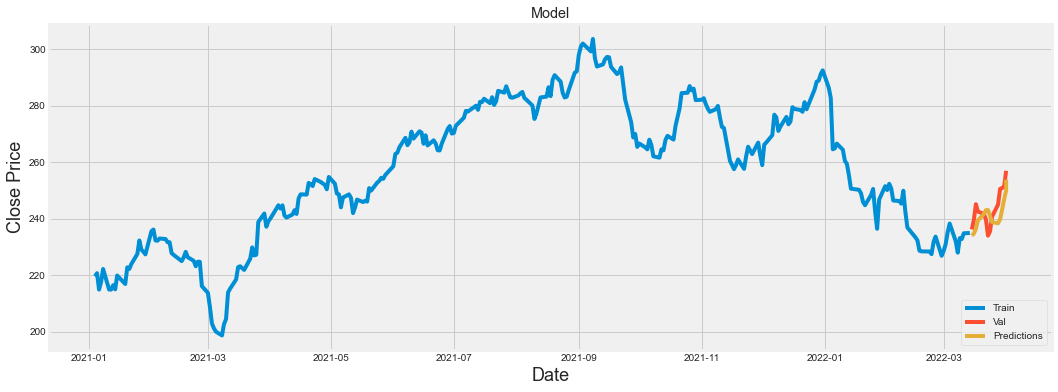

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,236.210007,233.958939
2022-03-16,239.630005,234.764420
2022-03-17,245.139999,236.383102
2022-03-18,242.529999,239.413055
2022-03-21,241.639999,241.703217
2022-03-22,239.669998,243.016296
2022-03-23,234.000000,243.049728
2022-03-24,235.490005,240.948502
2022-03-25,240.690002,238.815048
